In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import plotly.express as px

from manuscript_functions.colors import patient_to_id

In [2]:
sns.set_theme(font="Arial", style="ticks", rc={"font.size": 8,"axes.titlesize":8,"axes.labelsize":8, 
                                               "xtick.labelsize": 8, "ytick.labelsize": 8})
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 8

In [3]:
data = pd.read_excel("/Users/adr/Box/iPC_AML/Data/Patient molecular table AD.xlsx", index_col=0)
data

,PAUMTZ,Unnamed: 2,PAUZTH,Unnamed: 4,PAVRJP,Unnamed: 6,PAVSFB,Unnamed: 8,PAXJXC,Unnamed: 10,...,Unnamed: 30,PAVTDU,Unnamed: 32,PAWHML,Unnamed: 34,PAWZZN,Unnamed: 36,PAVEDT,Unnamed: 38,PAWHCT
Cyto/Fusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KMT2Ar,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RUNX1::T1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPM1::MLF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUP214::ABL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETV6::FOXO1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBFA2T3::GLIS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inv(8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transcription,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
if data.shape[1]<40:
    print("Adding ", 40-data.shape[1], " column(s)")
    data.loc[:,[f"Unnamed: {i+1}" for i in range(data.shape[1], 40)]] = np.nan

Adding  1  column(s)


In [5]:
annotation_rows = list(data.index[data.isnull().all(1)])
mut_and_anno_list = list(data.index)

mut_anno_dict = {}
for i, anno in enumerate(annotation_rows):
    
    if i == len(annotation_rows)-1:
        curr_anno_idx = mut_and_anno_list.index(anno)
        mutations = mut_and_anno_list[curr_anno_idx+1:]
    else:
        curr_anno_idx = mut_and_anno_list.index(anno)
        next_anno_idx = mut_and_anno_list.index(annotation_rows[i+1])

        mutations = mut_and_anno_list[curr_anno_idx+1:next_anno_idx]
    mut_anno_dict[anno] = mutations

mut_anno_dict

{'Cyto/Fusion': ['KMT2Ar',
  'RUNX1::T1',
  'NPM1::MLF1',
  'NUP214::ABL1',
  'ETV6::FOXO1',
  'CBFA2T3::GLIS2',
  'complex',
  'Inv(8)'],
 'Transcription': ['Biallelic CEBPa', 'NPM1c', 'WT1', 'MGA', 'GATA2', 'CRBBP'],
 'Signaling': ['NRAS', 'KRAS', 'NF1', 'PTPN11', 'PIK3CA'],
 'Epigenetic': ['KMT2A-PTD', 'ASXL1', 'SETD2', 'IDH1', 'IDH2'],
 'Receptors': ['FLT3', 'KIT', 'NOTCH1'],
 'Misc': ['CCND2']}

In [7]:
mut_anno_dict["Miscellaneous"] = mut_anno_dict["Misc"]
t = mut_anno_dict.pop("Misc")

In [8]:
data = data.drop(annotation_rows)
data = data.fillna(0)
data

,PAUMTZ,Unnamed: 2,PAUZTH,Unnamed: 4,PAVRJP,Unnamed: 6,PAVSFB,Unnamed: 8,PAXJXC,Unnamed: 10,...,PAVTDU,Unnamed: 32,PAWHML,Unnamed: 34,PAWZZN,Unnamed: 36,PAVEDT,Unnamed: 38,PAWHCT,Unnamed: 40
KMT2Ar,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RUNX1::T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NPM1::MLF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NUP214::ABL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETV6::FOXO1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CBFA2T3::GLIS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
complex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inv(8),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biallelic CEBPa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
NPM1c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [9]:
data.columns = [c if i%2==0 else data.columns[i-1] for i, c in enumerate(data.columns)]

In [10]:
data = data.T
data["time_point"] = ["Diagnosis", "Relapse"]*20
data  = data.reset_index(drop=False).rename(columns={'index':"patient_id"})
data["PatientID"] = [patient_to_id[p] for p  in data["patient_id"]]
data = data.set_index(["PatientID", "time_point"], append=False)
data = data.drop("patient_id", axis=1)
data = data.T
data

PatientID              P1                P4                P2          \
time_point      Diagnosis Relapse Diagnosis Relapse Diagnosis Relapse   
KMT2Ar                1.0     1.0       1.0     1.0       1.0     1.0   
RUNX1::T1             0.0     0.0       0.0     0.0       0.0     0.0   
NPM1::MLF1            0.0     0.0       0.0     0.0       0.0     0.0   
NUP214::ABL1          0.0     0.0       0.0     0.0       0.0     0.0   
ETV6::FOXO1           0.0     0.0       0.0     0.0       0.0     0.0   
CBFA2T3::GLIS2        0.0     0.0       0.0     0.0       0.0     0.0   
complex               0.0     0.0       0.0     0.0       0.0     0.0   
Inv(8)                0.0     0.0       0.0     0.0       0.0     0.0   
Biallelic CEBPa       0.0     0.0       0.0     0.0       0.0     0.0   
NPM1c                 0.0     0.0       0.0     0.0       0.0     0.0   
WT1                   0.0     0.0       0.0     0.0       0.0     0.0   
MGA                   0.0     0.0       0.0     0.0       0.0     0.0   
GATA2                 0.0     0.0       0.0     0.0       0.0     0.0   
CRBBP                 0.0     0.0       0.0     0.0       0.0     0.0   
NRAS                  1.0     1.0       0.0     0.0       2.0     0.0   
KRAS                  0.0     0.0       1.0     1.0       0.0     0.0   
NF1                   0.0     0.0       0.0     0.0       0.0     0.0   
PTPN11                1.0     0.0       0.0     0.0       1.0     0.0   
PIK3CA                0.0     0.0       0.0     0.0       0.0     1.0   
KMT2A-PTD             0.0     0.0       0.0     0.0       0.0     0.0   
ASXL1                 0.0     0.0       0.0     1.0       0.0     0.0   
SETD2                 0.0     0.0       0.0     0.0       2.0     0.0   
IDH1                  0.0     0.0       0.0     0.0       0.0     0.0   
IDH2                  0.0     0.0       0.0     0.0       0.0     0.0   
FLT3                  0.0     0.0       0.0     0.0       0.0     0.0   
KIT                   0.0     0.0       0.0     0.0       0.0     0.0   
NOTCH1                0.0     0.0       0.0     0.0       0.0     0.0   
CCND2                 0.0     0.0       0.0     0.0       0.0     0.0   

PatientID              P5                P7          ...       P15          \
time_point      Diagnosis Relapse Diagnosis Relapse  ... Diagnosis Relapse   
KMT2Ar                1.0     0.0       1.0     1.0  ...       0.0     0.0   
RUNX1::T1             0.0     0.0       0.0     0.0  ...       0.0     0.0   
NPM1::MLF1            0.0     0.0       0.0     0.0  ...       0.0     0.0   
NUP214::ABL1          0.0     0.0       0.0     0.0  ...       0.0     0.0   
ETV6::FOXO1           0.0     0.0       0.0     0.0  ...       0.0     0.0   
CBFA2T3::GLIS2        0.0     0.0       0.0     0.0  ...       0.0     0.0   
complex               0.0     0.0       0.0     0.0  ...       0.0     0.0   
Inv(8)                0.0     0.0       0.0     0.0  ...       1.0     1.0   
Biallelic CEBPa       0.0     0.0       0.0     0.0  ...       0.0     0.0   
NPM1c                 0.0     0.0       0.0     0.0  ...       0.0     0.0   
WT1                   0.0     0.0       0.0     0.0  ...       0.0     1.0   
MGA                   0.0     0.0       0.0     0.0  ...       0.0     0.0   
GATA2                 0.0     0.0       0.0     1.0  ...       1.0     0.0   
CRBBP                 0.0     0.0       0.0     0.0  ...       0.0     0.0   
NRAS                  1.0     0.0       0.0     0.0  ...       0.0     0.0   
KRAS                  0.0     0.0       1.0     1.0  ...       0.0     0.0   
NF1                   0.0     0.0       0.0     0.0  ...       0.0     0.0   
PTPN11                0.0     0.0       0.0     0.0  ...       0.0     0.0   
PIK3CA                0.0     0.0       0.0     0.0  ...       0.0     0.0   
KMT2A-PTD             0.0     0.0       0.0     0.0  ...       0.0     0.0   
ASXL1                 0.0     0.0       0.0     0.0  ...       0.0     0.0   
SETD2          

In [11]:
mut_counts = data.copy()
muts_per_patient = mut_counts.sum(axis=0)
mut_counts = mut_counts.astype(int)
mut_counts[(mut_counts==0)|(mut_counts==1)] = ""
mut_counts = mut_counts.astype("str")
mut_counts

PatientID              P1                P4                P2          \
time_point      Diagnosis Relapse Diagnosis Relapse Diagnosis Relapse   
KMT2Ar                                                                  
RUNX1::T1                                                               
NPM1::MLF1                                                              
NUP214::ABL1                                                            
ETV6::FOXO1                                                             
CBFA2T3::GLIS2                                                          
complex                                                                 
Inv(8)                                                                  
Biallelic CEBPa                                                         
NPM1c                                                                   
WT1                                                                     
MGA                                                                     
GATA2                                                                   
CRBBP                                                                   
NRAS                                                        2           
KRAS                                                                    
NF1                                                                     
PTPN11                                                                  
PIK3CA                                                                  
KMT2A-PTD                                                               
ASXL1                                                                   
SETD2                                                       2           
IDH1                                                                    
IDH2                                                                    
FLT3                                                                    
KIT                                                                     
NOTCH1                                                                  
CCND2                                                                   

PatientID              P5                P7          ...       P15          \
time_point      Diagnosis Relapse Diagnosis Relapse  ... Diagnosis Relapse   
KMT2Ar                                               ...                     
RUNX1::T1                                            ...                     
NPM1::MLF1                                           ...                     
NUP214::ABL1                                         ...                     
ETV6::FOXO1                                          ...                     
CBFA2T3::GLIS2                                       ...                     
complex                                              ...                     
Inv(8)                                               ...                     
Biallelic CEBPa                                      ...                     
NPM1c                                                ...                     
WT1                                                  ...                     
MGA                                                  ...                     
GATA2                                                ...                     
CRBBP                                                ...                     
NRAS                                                 ...                     
KRAS                                                 ...                     
NF1                                                  ...                     
PTPN11                                               ...                     
PIK3CA                                               ...                     
KMT2A-PTD                                            ...                     
ASXL1                                                ...                     
SETD2          

In [12]:

for i, (anno, muts) in enumerate(mut_anno_dict.items()):
    data.loc[muts, :]>0
    data[data.loc[muts, :]>0] = i+1
    
data.loc[data.index!="KMT2Ar", (patient_to_id["PAVSFB"], "Relapse")] = 8
data.loc[data.index!="KMT2Ar", (patient_to_id["PAXMLI"], "Relapse")] = 8
data.loc[data.index!="KMT2A-PTD", (patient_to_id["PAWHCT"], "Relapse")] = 8

In [13]:
data.shape

(28, 40)

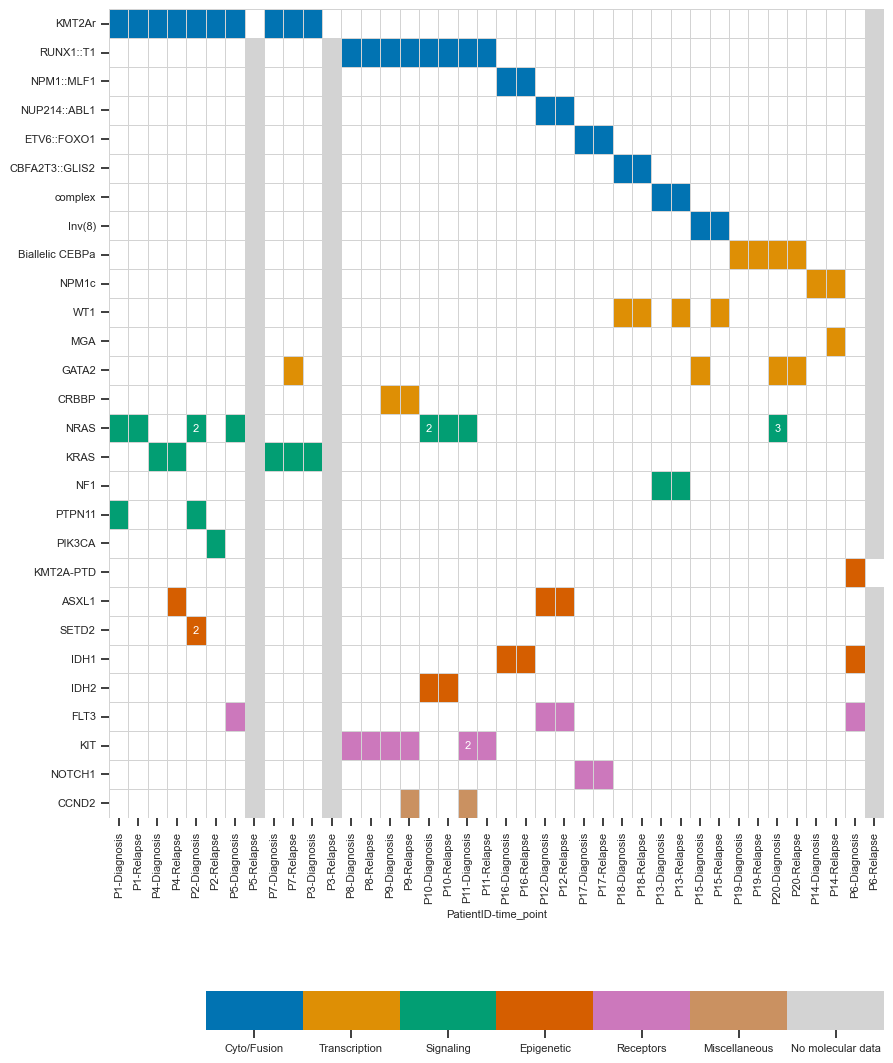

In [14]:
myColors = [(1.,1.,1.)]+sns.color_palette("colorblind")[:6] + [(211/255,211/255,211/255)]
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

plt.figure(figsize=(10,15))
ax = sns.heatmap(data, cmap=cmap, linewidths=.5, linecolor='lightgray', 
                 yticklabels=True, xticklabels=True, annot=mut_counts, fmt="s",
                cbar_kws = dict(use_gridspec=False,orientation="horizontal"))

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
# colorbar.set_ticklabels(["A", "C", "V"])
colorbar.set_ticklabels(list(mut_anno_dict.keys())+["No molecular data"])


In [15]:
mut_changes = pd.DataFrame(
{"KMT2Ar":          {"gained": 0, "lost": 0, "remained": 6, "no remission molecular data":0},
 "RUNX1::T1":       {"gained": 0, "lost": 0, "remained": 4, "no remission molecular data": 0},
 "NPM1::MLF1":      {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "NUP214::ABL1":    {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "ETV6::FOXO1":     {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "CBFA2T3::GLIS2":  {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "complex":         {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "Inv(8)":          {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "Biallelic CEBPa": {"gained": 0, "lost": 0, "remained": 2, "no remission molecular data": 0},
 "NPM1c":           {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "WT1":             {"gained": 2, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "MGA":             {"gained": 1, "lost": 0, "remained": 0, "no remission molecular data": 0},
 "GATA2":           {"gained": 1, "lost": 1, "remained": 1, "no remission molecular data": 0},
 "CRBBP":           {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "NRAS":            {"gained": 0, "lost": 3, "remained": 2, "no remission molecular data": 1},
 "KRAS":            {"gained": 0, "lost": 0, "remained": 2, "no remission molecular data": 1},
 "NF1":             {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "PTPN11":          {"gained": 0, "lost": 2, "remained": 0, "no remission molecular data": 0},
 "PIK3CA":          {"gained": 1, "lost": 0, "remained": 0, "no remission molecular data": 0},
 "KMT2A-PTD":       {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "ASXL1":           {"gained": 1, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "SETD2":           {"gained": 0, "lost": 1, "remained": 0, "no remission molecular data": 0},
 "IDH1":            {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 1},
 "IDH2":            {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "FLT3":            {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 2},
 "KIT":             {"gained": 0, "lost": 0, "remained": 3, "no remission molecular data": 0},
 "NOTCH1":          {"gained": 0, "lost": 0, "remained": 1, "no remission molecular data": 0},
 "CCND2":           {"gained": 1, "lost": 1, "remained": 0, "no remission molecular data": 0},
})
mut_changes = mut_changes.T
# mut_changes = pd.melt(mut_changes, id_vars="Mutation", var_name="type", value_name="number of patients")
mut_changes

,gained,lost,remained,no remission molecular data
KMT2Ar,0,0,6,0
RUNX1::T1,0,0,4,0
NPM1::MLF1,0,0,1,0
NUP214::ABL1,0,0,1,0
ETV6::FOXO1,0,0,1,0
CBFA2T3::GLIS2,0,0,1,0
complex,0,0,1,0
Inv(8),0,0,1,0
Biallelic CEBPa,0,0,2,0
NPM1c,0,0,1,0


In [16]:
mut_changes_cmap = ListedColormap([(0.984313725490196, 0.6862745098039216, 0.8941176470588236), 
                (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
                (0.9254901960784314, 0.8823529411764706, 0.2),
                (211/255,211/255,211/255)])

<AxesSubplot:>

<Figure size 1500x1000 with 0 Axes>

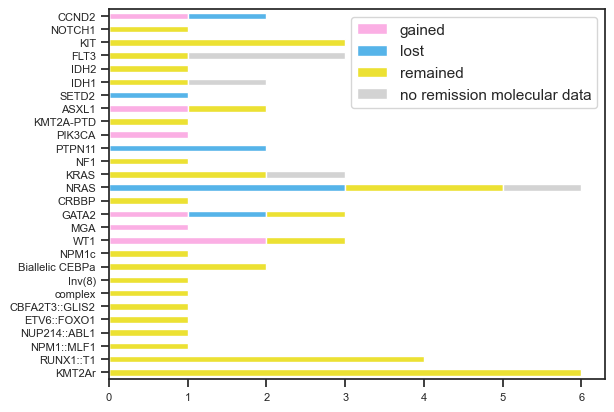

In [17]:
plt.figure(figsize=(15,10))
mut_changes.plot(kind="barh", stacked=True, colormap=mut_changes_cmap)



<AxesSubplot:xlabel='PatientID,time_point'>

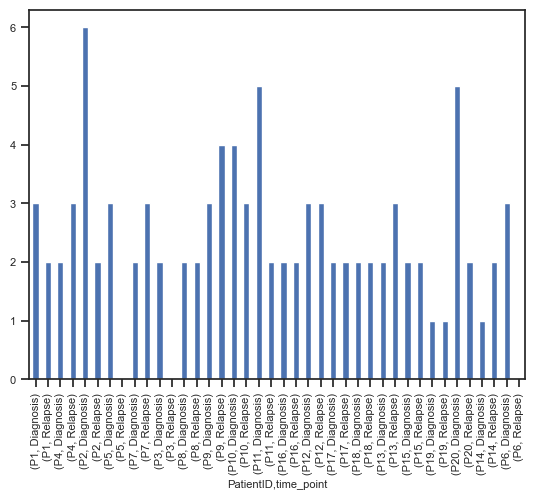

In [18]:
muts_per_patient.plot(kind="bar", )

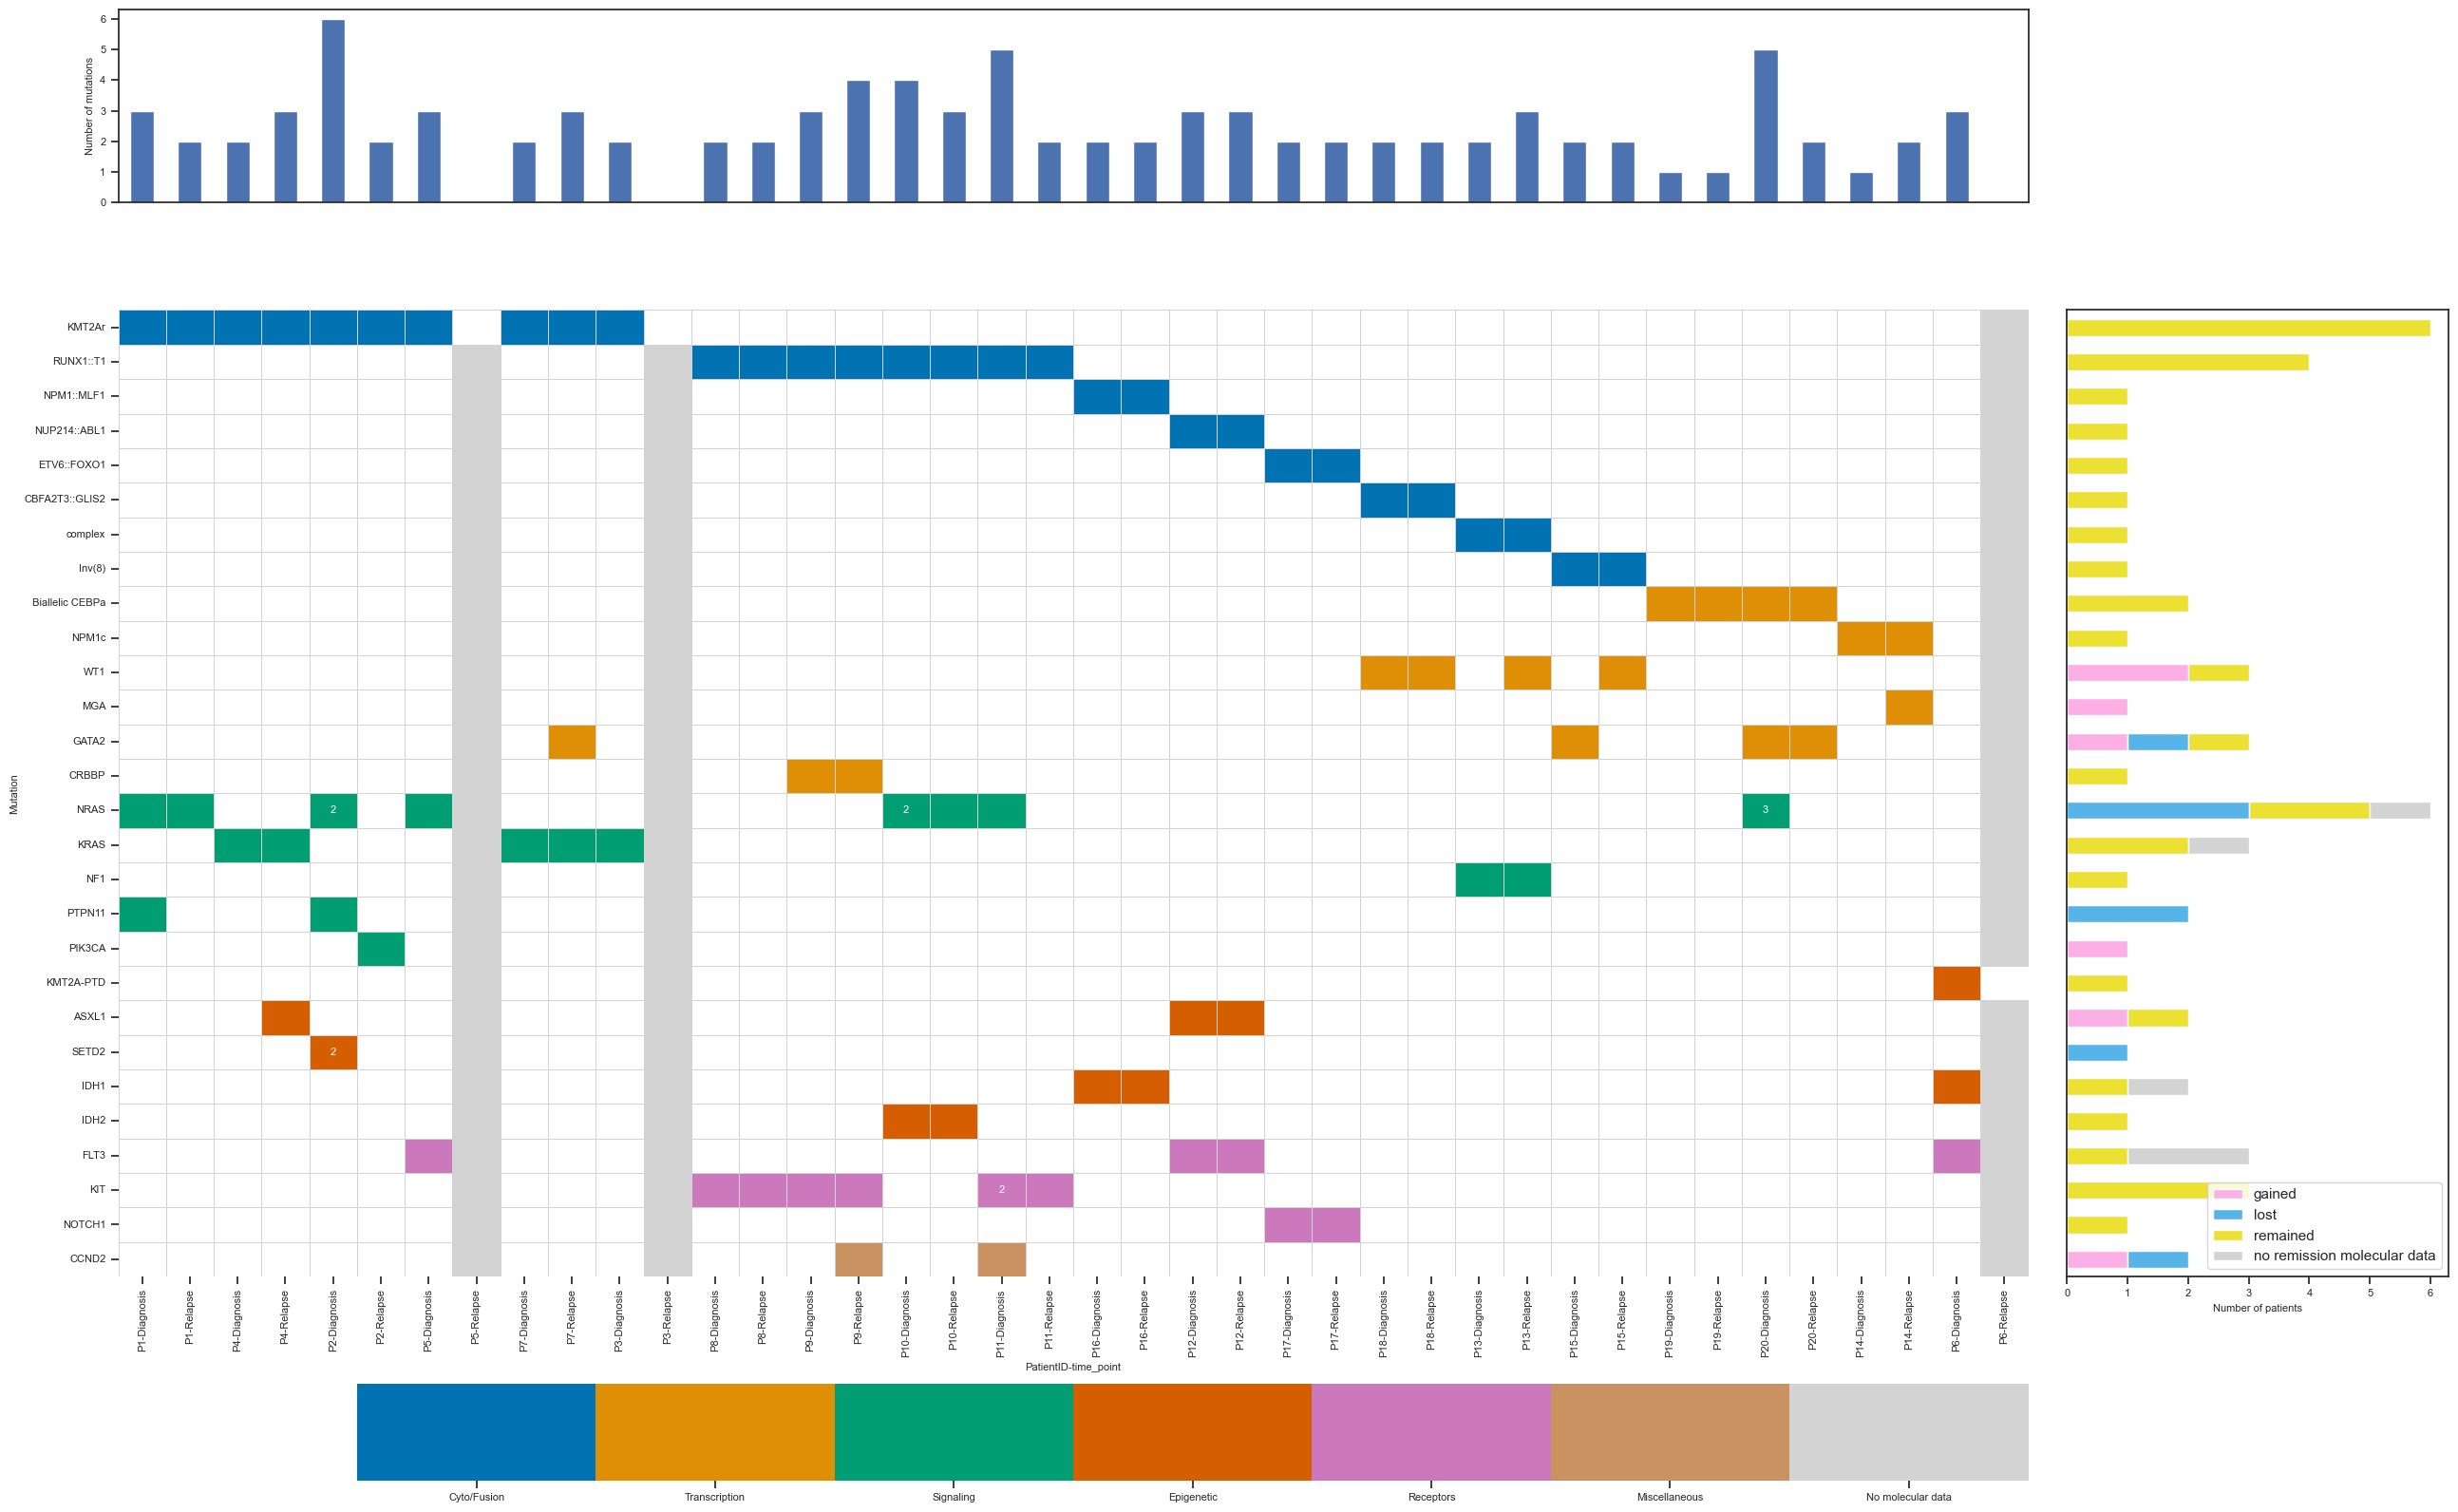

In [19]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(nrows=3, ncols=2, 
                                                      figsize=(26, 16), #sharex='col', sharey="row",
                                                     gridspec_kw={"height_ratios": [1,5, 0.5],
                                                                 "width_ratios": [5,1]})
fig.delaxes(ax= ax2)
fig.delaxes(ax= ax6)


# Heatmap
p = sns.heatmap(data, cmap=cmap, linewidths=.5, linecolor='lightgray', 
                 yticklabels=True, xticklabels=True, annot=mut_counts, fmt="s", ax=ax3, cbar_ax=ax5,
                cbar_kws = dict(use_gridspec=False,orientation="horizontal"))
t = ax3.yaxis.set_label_text("Mutation")
ax3.figure.tight_layout()
colorbar = p.collections[0].colorbar
colorbar.set_ticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
colorbar.set_ticklabels(list(mut_anno_dict.keys())+["No molecular data"])

# Barplot x
f = mut_changes.iloc[::-1].plot(kind="barh", stacked=True, ax=ax4, sharey=ax3, 
                     colormap=mut_changes_cmap)
ax4.tick_params(axis="y", which="both", left=False)
t = ax4.xaxis.set_label_text("Number of patients")

# Barplot y
muts_per_patient.plot(kind="bar", ax=ax1)
ax1.tick_params(axis="x", which="both", bottom=False)
t = ax1.xaxis.set_ticklabels([])
t = ax1.xaxis.set_label_text("")
t = ax1.yaxis.set_label_text("Number of mutations")

plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Suppl_Items/Table_figure.pdf")